# PART A: sentence that is misclassified by pos_tag 

In [13]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize

sentences = sent_tokenize("That is a beautiful orange flower.")
#words = word_tokenize("Fish sleep.")

for i, sentence in enumerate(sentences):
    print(f'Sentence {i}: {sentence}')
    words = nltk.word_tokenize(sentence)
    tags = nltk.pos_tag(words)
    for word, tag in tags:
        print(f'{word}: {tag}')
    print()


Sentence 0: That is a beautiful orange flower.
That: DT
is: VBZ
a: DT
beautiful: JJ
orange: NN
flower: NN
.: .



POS tagger output
(That, DT) (is, VBZ) (a,DT) (beautiful,JJ) (orange,NN) (flower,NN)

Expected output
(That, DT) (is, VBZ) (a,DT) (beautiful,JJ) (orange,JJ) (flower,NN)

Orange is 'adjective' but is classified wrongly as 'Noun'


# groundtruth POS tags for brown corpus

In [15]:
groundtruth_tags = nltk.corpus.brown.tagged_words(tagset='universal')
print(groundtruth_tags[:5])
print(len(nltk.corpus.brown.tagged_words(tagset='universal')))


[('The', 'DET'), ('Fulton', 'NOUN'), ('County', 'NOUN'), ('Grand', 'ADJ'), ('Jury', 'NOUN')]
1161192


# calculate predicted POS tags for brown corpus using nltk.pos_tag

In [20]:
predicted_tags = []
groundtruth = list(zip(*groundtruth_tags))
groundtruth_pos = groundtruth[1]
words = groundtruth[0]

predicted_tags = nltk.pos_tag(words,tagset='universal')
print(len(predicted_tags))
print(predicted_tags[:5])

predicted = list(zip(*predicted_tags))
predicted_pos = predicted[1]
    
    

1161192
[('The', 'DET'), ('Fulton', 'NOUN'), ('County', 'NOUN'), ('Grand', 'NOUN'), ('Jury', 'NOUN')]


In [30]:
#calculate confusion matrix
from sklearn.metrics import confusion_matrix
labels = list(set(groundtruth_pos))
print(labels)
conf_mat = confusion_matrix(groundtruth_pos, predicted_pos,labels=labels)

['.', 'ADP', 'NUM', 'X', 'DET', 'VERB', 'CONJ', 'PRT', 'PRON', 'NOUN', 'ADV', 'ADJ']


# heat map of confusion matrix

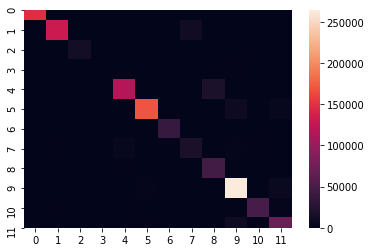

In [31]:
import numpy as np; np.random.seed(0)
import seaborn as sns;
ax = sns.heatmap(conf_mat)

# Discussion:


From the heatmap, we can see that 'white square' label on 9th row is predicted correctly a lot of times. So, 'Noun' label is predicted correctly often. On the other hand, 3rd row is predicted incorrectly often. That is, 'X' label is incorrectly classified. 

In [33]:
#words that are actually X but were predicted as other labels
incorrect_x = []
for i in range(len(groundtruth_pos)):
    if groundtruth_pos[i] == 'X' and groundtruth_pos[i]!=predicted_pos[i]:
        incorrect_x.append((words[i],groundtruth_pos[i],predicted_pos[i]))

print(incorrect_x[:5])        

[('ad', 'X', 'NOUN'), ('hoc', 'X', 'NOUN'), ('coup', 'X', 'NOUN'), ("d'etat", 'X', 'NOUN'), ('et', 'X', 'ADV')]


# here we see that words like 'ad', 'hoc', 'coup' belongs to 'X' but are classified as 'Noun'